In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('/content/heart.csv')

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
df.shape

(918, 12)

In [45]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [46]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [47]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [48]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [51]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType','ExerciseAngina', 'RestingECG', 'ST_Slope'], drop_first=True)

In [52]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,False,True,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,False,True,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,True,False,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,False,True,False,False,True


In [53]:
df.isnull().sum()

,0
Age,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
Oldpeak,0
HeartDisease,0
Sex_M,0
ChestPainType_ATA,0
ChestPainType_NAP,0


In [54]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease', ylabel='Density'>

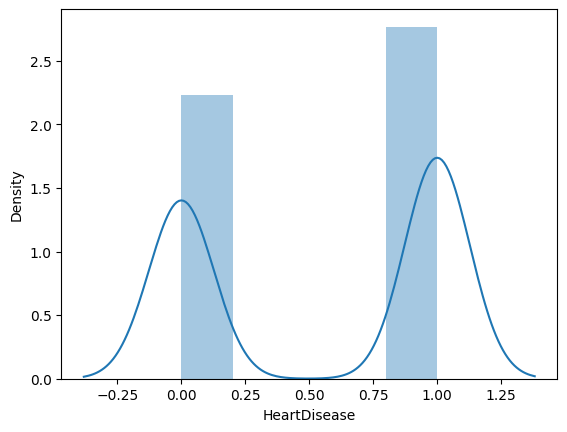

In [55]:
sns.distplot(df['HeartDisease'])

In [56]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,0.215793,-0.230566,0.136798,0.185568,-0.258067
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133,-0.046153,-0.041348,0.049855,0.155101,-0.116851,0.090447,0.099207,-0.096146
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092,0.150954,-0.006634,0.017365,-0.034166,-0.038470,-0.133106,-0.050953,0.094027
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076,-0.140514,-0.039249,0.026885,0.060451,-0.093028,0.127110,0.107006,-0.161730
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,-0.370425,0.023801,-0.157879,-0.342581,0.383397
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,0.408752,-0.116719,0.055958,0.283295,-0.450577
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,0.494282,-0.091580,0.102527,0.554134,-0.622164
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,0.190664,-0.010634,0.063715,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,-0.300365,0.107941,-0.046111,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,-0.166030,0.005010,-0.042236,-0.072031,0.093583


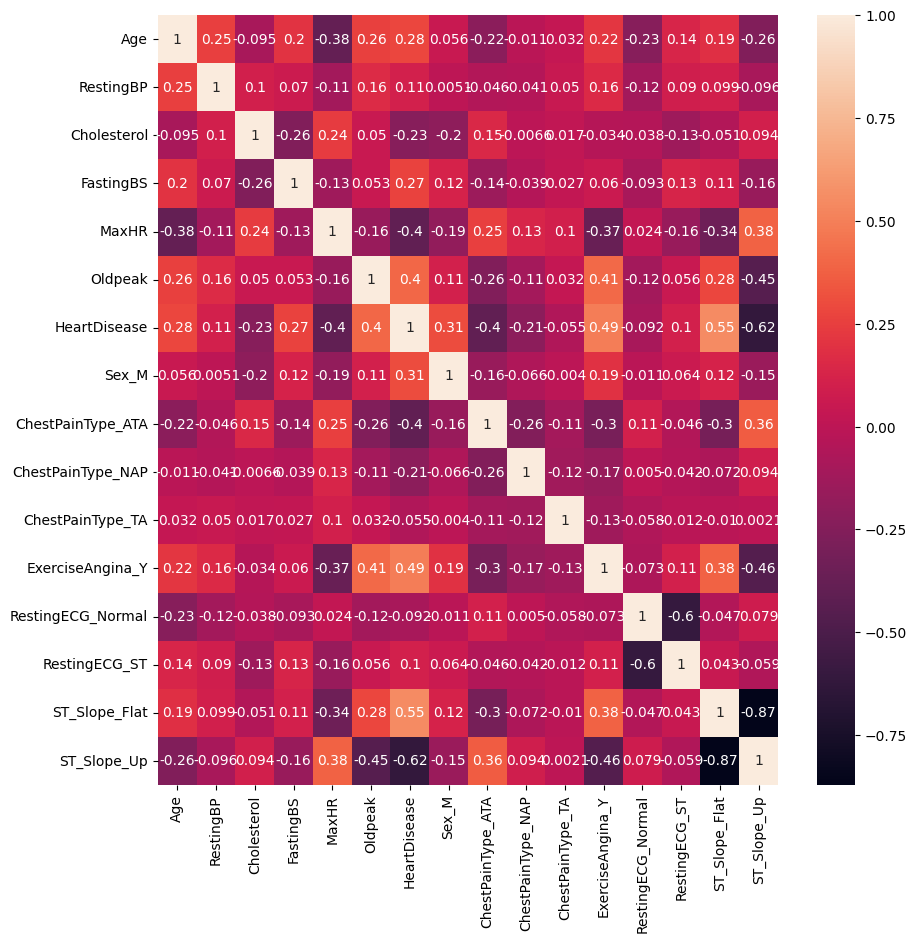

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [58]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [59]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,False,True,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,False,True,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,False,True,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,True,False,True,False
4,54,150,195,0,122,0.0,True,False,True,False,False,True,False,False,True


In [60]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(x_train, y_train)

LogisticRegression()

In [65]:
lr.score(x_train, y_train)

0.8746594005449592

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr1 = LinearRegression()

In [69]:
lr1.fit(x_train, y_train)

LinearRegression()

In [70]:
lr1.score(x_train, y_train)

0.5826525384883001

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
prediction = lr.predict(x_test)

In [74]:
prediction

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
accuracy = confusion_matrix(y_test,prediction)

In [78]:
accuracy

array([[66, 11],
       [16, 91]])

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

In [80]:
accuracy

0.8532608695652174

In [81]:
precision

0.8921568627450981

In [82]:
recall

0.8504672897196262

In [83]:
f1

0.8708133971291866

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [87]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [88]:
y_pred = svm.predict(x_test)

In [90]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.67      0.71       107

    accuracy                           0.68       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.68      0.69       184

[[54 23]
 [35 72]]
